# जय श्री राम

In [21]:
#### Importing Libraries ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#### Loading data ####
data = pd.read_csv('data/train.csv')


In [23]:
def target_guided_ordinal_encoding(data,features):
    daddy_dict = {}
    for f in features:
        l = data.groupby([feature])['SalePrice'].mean().sort_values().index
        d = {l[i]:i+1 for i in range(len(l)) }
        daddy_dict[feature] = d
    for i in daddy_dict.keys():
        data[i] = data[i].map(daddy_dict[i])

In [24]:
for i in ['BsmtQual','BsmtExposure','BsmtFinType1','FireplaceQu']:
    data[i].fillna('M',inplace=True)

In [25]:
features = ['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
            'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st',
            'Exterior2nd','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1',
           'HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish',]
for feature in features:
    target_guided_ordinal_encoding(data,feature)

In [26]:
data.drop(['Street','Alley','Utilities','RoofMatl','ExterCond','MasVnrType','BsmtCond',
           'BsmtFinType2','Heating','Electrical','Functional','GarageQual',
          'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [27]:
data['CentralAir'] = np.where(data['CentralAir'] == 'Y' , 1 , 0)

In [28]:
for i in ['LotFrontage','MasVnrArea','GarageType','GarageYrBlt','GarageFinish']:
    data[i].fillna(data[i].mean(),inplace=True)

#### Feature Selection NOW

In [29]:
crr = data.corr()
crr.shape

(62, 62)

<AxesSubplot: >

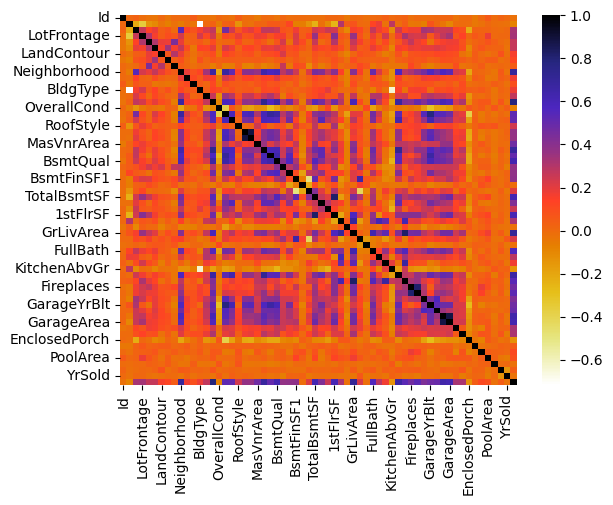

In [30]:
import seaborn as snb
snb.heatmap(crr,cmap=plt.cm.CMRmap_r)

In [31]:
def correlation(dataset,threshold): #threshold for minimum correlation
    col_corr = set() # set() to deal with duplicates
    corr_mat = dataset.corr()
    for i in range(len(corr_mat)):
        for j in range(i):
            if corr_mat.iloc[i,j] >= threshold:
                col_corr.add(corr_mat.columns[i])
    return col_corr

In [45]:
cols = correlation(data,0.6)

In [46]:
len(cols)

18